### Chop up existing dataset images

In [49]:
import sys
sys.path.append("/home/aj/robosys24/BlueberryJam/src")

from Classifier import *
import cv2 as cv
import numpy as np
from matplotlib import colors
import matplotlib.pyplot as plt

##### Explore Color Spaces for Ripe Berries

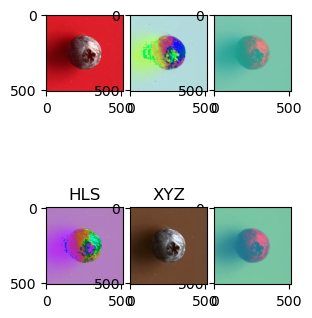

In [50]:
ripe_path = 'R_06.05.jpg'
img = cv.imread('../img/test_set/ripe/'+ripe_path)

# convert from BGR to other color spaces
img_rgb = cv.cvtColor(img, cv.COLOR_BGR2RGB)
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
img_lab = cv.cvtColor(img, cv.COLOR_BGR2LAB)
img_luv = cv.cvtColor(img, cv.COLOR_BGR2LUV)
img_hls = cv.cvtColor(img, cv.COLOR_BGR2HLS)
img_xyz = cv.cvtColor(img, cv.COLOR_BGR2XYZ)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=4, ncols=12)
fig.add_subplot(gridspec[0:2, 0:2])
plt.imshow(img_rgb)
fig.add_subplot(gridspec[0:2, 2:4])
plt.imshow(img_hsv)
fig.add_subplot(gridspec[0:2, 4:6])
plt.imshow(img_lab)
fig.add_subplot(gridspec[2:4, 4:6])
plt.imshow(img_luv)
fig.add_subplot(gridspec[2:4, 0:2])
plt.title("HLS")
plt.imshow(img_hls)
fig.add_subplot(gridspec[2:4, 2:4])
plt.title("XYZ")
plt.imshow(img_xyz)

##### Explore Color Spaces for Overripe Berries

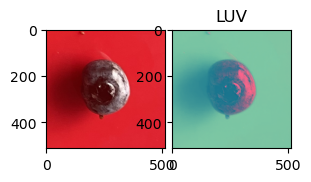

In [51]:
overripe_path = 'OR_01.07.jpg'
imgOR = cv.imread('../img/test_set/overripe/'+overripe_path)
# overripe_path = 'R_06.14.jpg'
# imgOR = cv.imread('../img/test_set/ripe/'+overripe_path)

# convert from BGR to other color spaces
imgOR_rgb = cv.cvtColor(imgOR, cv.COLOR_BGR2RGB)
imgOR_luv = cv.cvtColor(imgOR, cv.COLOR_BGR2LUV)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=2, ncols=12)
fig.add_subplot(gridspec[0:2, 0:3])
plt.imshow(imgOR_rgb)
fig.add_subplot(gridspec[0:2, 3:6])
plt.title("LUV")
plt.imshow(imgOR_luv)

##### Explore Color Spaces for Unripe Berries

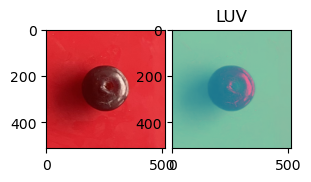

In [52]:
unripe_path = 'UR_03.8.jpg'
imgUR = cv.imread('../img/test_set/unripe/'+unripe_path)

# convert from BGR to other color spaces
imgUR_rgb = cv.cvtColor(imgUR, cv.COLOR_BGR2RGB)
imgUR_luv = cv.cvtColor(imgUR, cv.COLOR_BGR2LUV)

# display image in color spaces
fig = plt.figure()
gridspec = fig.add_gridspec(nrows=2, ncols=12)
fig.add_subplot(gridspec[0:2, 0:3])
plt.imshow(imgUR_rgb)
fig.add_subplot(gridspec[0:2, 3:6])
plt.title("LUV")
plt.imshow(imgUR_luv)

##### Split images into color channels

In [53]:
norm = colors.Normalize(vmin=-1.,vmax=1.)

pixel_colors = img_luv.reshape((np.shape(img_luv)[0]*np.shape(img_luv)[1], 3))
OR_pixel_colors = imgOR_luv.reshape((np.shape(imgOR_luv)[0]*np.shape(imgOR_luv)[1], 3))
UR_pixel_colors = imgUR_luv.reshape((np.shape(imgUR_luv)[0]*np.shape(imgUR_luv)[1], 3))

norm.autoscale(pixel_colors)
norm.autoscale(OR_pixel_colors)
norm.autoscale(UR_pixel_colors)
pixel_colors = norm(pixel_colors).tolist()
OR_pixel_colors = norm(OR_pixel_colors).tolist()
UR_pixel_colors = norm(UR_pixel_colors).tolist()

x, y, z = cv.split(img_luv)
# rl_mode = st.mode(x.flatten(), keepdims=0)
# rl_avg = np.average(x.flatten())
# rl_med = np.median(x.flatten())
# ru_mode = st.mode(y.flatten(), keepdims=0)
# ru_avg = np.average(y.flatten())
# ru_med = np.median(y.flatten())
# rv_mode = st.mode(z.flatten(), keepdims=0)
# rv_avg = np.average(z.flatten())

or_l, or_u, or_v = cv.split(imgOR_luv)
# orl_mode = st.mode(or_l.flatten(), keepdims=0)
# orl_avg = np.average(or_l.flatten())
# oru_mode = st.mode(or_u.flatten(), keepdims=0)
# oru_avg = np.average(or_u.flatten())
# orv_mode = st.mode(or_v.flatten(), keepdims=0)
# orv_avg = np.average(or_v.flatten())

ur_l, ur_u, ur_v = cv.split(imgUR_luv)
# url_mode = st.mode(ur_l.flatten(), keepdims=0)
# url_avg = np.average(ur_l.flatten())
# uru_mode = st.mode(ur_u.flatten(), keepdims=0)
# uru_avg = np.average(ur_u.flatten())
# urv_mode = st.mode(ur_v.flatten(), keepdims=0)
# urv_avg = np.average(ur_v.flatten())

##### Visualize color distribution for berry images 
###### (**hefty!** -- set ```img_show``` to False to save time and resources)

In [54]:
img_show = False
if img_show:
    # fig_3d = plt.figure()
    # xyz_axis = fig_3d.add_subplot(1, 2, 1, projection="3d")
    # xyz_axis.scatter(x.flatten(), y.flatten(), z.flatten(), facecolors=pixel_colors, marker=".")
    # xyz_axis.set_xlabel("L")
    # xyz_axis.set_ylabel("U")
    # xyz_axis.set_zlabel("V")
    # plt.title('Ripe')

    # plt.title('Ripe')
    # plt.scatter(x.flatten(), y.flatten(), facecolors=pixel_colors, marker=".")
    # plt.xlabel("L")
    # plt.ylabel("U")
    # plt.figure()

    # plt.figure().add_subplot(1, 2, 1, projection="3d").scatter(or_l.flatten(), or_u.flatten(), or_v.flatten(), facecolors=OR_pixel_colors, marker=".")
    # plt.title('Overripe')
    # plt.scatter(or_v.flatten(), or_u.flatten(), facecolors=OR_pixel_colors, marker=".")
    # plt.xlabel("L")
    # plt.ylabel("U")
    # plt.figure()

    # plt.scatter(or_u.flatten(), or_v.flatten(), facecolors=OR_pixel_colors, marker=".")
    # plt.xlabel("U")
    # plt.ylabel("V")
    # plt.figure()

    # fig_3d = plt.figure()
    # xyz_axis = fig_3d.add_subplot(1, 2, 1, projection="3d")
    # xyz_axis.scatter(ur_l.flatten(), ur_u.flatten(), ur_v.flatten(), facecolors=UR_pixel_colors, marker=".")
    # xyz_axis.set_xlabel("L")
    # xyz_axis.set_ylabel("U")
    # xyz_axis.set_zlabel("V")

    plt.title('Underripe')
    plt.scatter(ur_l.flatten(), ur_u.flatten(), s=ur_v.flatten(), c=UR_pixel_colors, marker=".")
    plt.xlabel("L")
    plt.ylabel("U")
    plt.figure()

    plt.scatter(ur_u.flatten(), ur_v.flatten(), s=ur_l.flatten(), c=UR_pixel_colors, marker=".")
    plt.xlabel("U")
    plt.ylabel("V")
    plt.figure()

    plt.imshow(imgUR_luv)

##### Define and apply mask

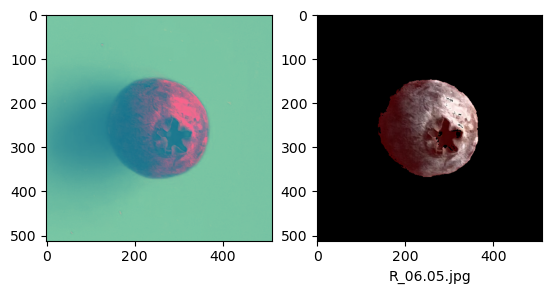

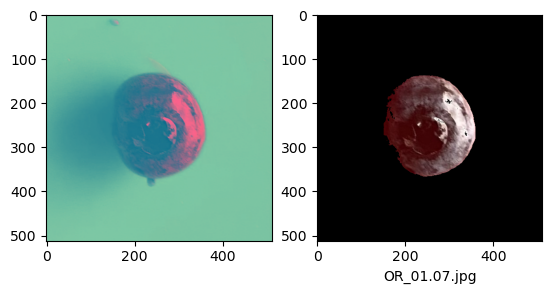

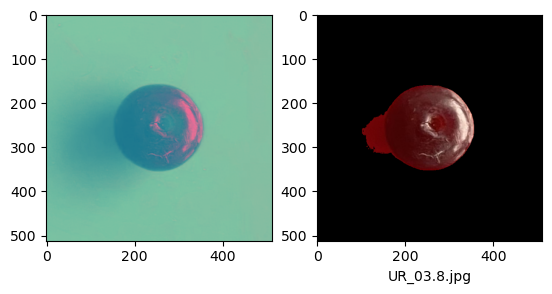

In [63]:
luv_lo = (10, 70, 100) # initial test conditions
luv_hi = (250, 125, 160)
# luv_lo = (0, 70, 100) # lab conditions
# luv_hi = (95, 125, 134)

luvur_lo = (0, 70, 120)
luvur_hi = (255, 148, 220)

mask_luv = cv.inRange(img_luv, luv_lo, luv_hi)
mask_UR = cv.inRange(imgUR_luv, luvur_lo, luvur_hi)
maskOR_luv = cv.inRange(imgOR_luv, luv_lo, luv_hi)
result = cv.bitwise_and(img_rgb, img_rgb, mask=mask_luv)
result_OR = cv.bitwise_and(imgOR_rgb, imgOR_rgb, mask=maskOR_luv)
result_UR = cv.bitwise_and(imgUR_rgb, imgUR_rgb, mask=mask_UR)
# result_luv = cv.bitwise_and(img_luv, img_luv, mask=mask_luv)

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(img_luv)
plt.subplot(1, 2, 2)
plt.imshow(result)
plt.xlabel(ripe_path)
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imgOR_luv)
plt.subplot(1, 2, 2)
plt.imshow(result_OR)
plt.xlabel(overripe_path)
plt.show()

plt.figure()
plt.subplot(1, 2, 1)
plt.imshow(imgUR_luv)
plt.subplot(1, 2, 2)
plt.imshow(result_UR)
plt.xlabel(unripe_path)
plt.show()

##### Determine the color channel with the largest difference between ripeness categories
###### (also can be hefty -- set ```plot_show``` to False to save time and resources)

In [56]:
plot_show = False
histSize = 256
histRange = (0, 255)
if plot_show:
    URLcounts = plt.hist(ur_l.flatten(), bins=histSize, range=histRange, alpha=0.3, color='b')
    RLcounts = plt.hist(x.flatten(), bins=histSize, range=histRange, alpha=0.3, color='r')
    ORLcounts = plt.hist(or_l.flatten(), bins=histSize, range=histRange, alpha=0.3, color='g')
    plt.figure()
    plt.legend(('unripe', 'ripe','overripe'), loc = 'upper left')
    plt.xlabel('L Pixel Intensity'), plt.ylabel('Frequency')
    plt.show()
else:
    URLcounts = np.histogram(ur_l.flatten(), bins=histSize, range=histRange)
    RLcounts = np.histogram(x.flatten(), bins=histSize, range=histRange)
    ORLcounts = np.histogram(or_l.flatten(), bins=histSize, range=histRange)
# TODO: convert all histogram functions to np.histogram from plt.hist

In [57]:
if plot_show:
    URUcounts = plt.hist(ur_u.flatten(), bins=histSize, range=histRange, alpha=0.3, color='b')
    RUcounts = plt.hist(y.flatten(), bins=histSize, range=histRange, alpha=0.3, color='r')
    ORUcounts = plt.hist(or_u.flatten(), bins=histSize, range=histRange, alpha=0.3, color='g')
    plt.figure()
    plt.legend(('unripe', 'ripe','overripe'), loc = 'upper left')
    plt.xlabel('U Pixel Intensity'), plt.ylabel('Frequency')
    plt.show()
else:
    URUcounts = np.histogram(ur_u.flatten(), bins=histSize, range=histRange)
    RUcounts = np.histogram(y.flatten(), bins=histSize, range=histRange)
    ORUcounts = np.histogram(or_u.flatten(), bins=histSize, range=histRange)

In [58]:
if plot_show:
    URVcounts = plt.hist(ur_v.flatten(), bins=histSize, range=histRange, alpha=0.3, color='b')
    RVcounts = plt.hist(z.flatten(), bins=histSize, range=histRange, alpha=0.3,  color='r')
    ORVcounts = plt.hist(or_v.flatten(), bins=histSize, range=histRange, alpha=0.3, color='g')
    plt.figure()
    plt.legend(('unripe', 'ripe','overripe'), loc = 'upper left')
    plt.xlabel('V Pixel Intensity'), plt.ylabel('Frequency')
    plt.show()
else:
    URVcounts = np.histogram(ur_v.flatten(), bins=histSize, range=histRange)
    RVcounts = np.histogram(z.flatten(), bins=histSize, range=histRange)
    ORVcounts = np.histogram(or_v.flatten(), bins=histSize, range=histRange)

##### Convert histograms to 1D vectors

In [59]:
def norm(vector):
    return np.sqrt(sum(x * x for x in vector))    

def cosine_similarity(vec_a, vec_b):
        norm_a = norm(vec_a)
        norm_b = norm(vec_b)
        dot = sum(a * b for a, b in zip(vec_a, vec_b))
        return dot / (norm_a * norm_b) if norm_a * norm_b != 0 else 0.0

#pixel intensity vectors [0] is the value, [1] is the bins?
URLvalues = URLcounts[0].tolist()
URUvalues = URUcounts[0].tolist()
URVvalues = URVcounts[0].tolist()

RLvalues = RLcounts[0].tolist()
RUvalues = RUcounts[0].tolist()
RVvalues = RVcounts[0].tolist()

ORLvalues = ORLcounts[0].tolist()
ORUvalues = ORUcounts[0].tolist()
ORVvalues = ORVcounts[0].tolist()

URRLsim = cosine_similarity(URLvalues, RLvalues)
URRUsim = cosine_similarity(URUvalues, RUvalues)
URRVsim = cosine_similarity(URVvalues, RVvalues)

avg_URRL = np.average([URRLsim, URRUsim, URRVsim])

ORRLsim = cosine_similarity(ORLvalues, RLvalues)
ORRUsim = cosine_similarity(ORUvalues, RUvalues)
ORRVsim = cosine_similarity(ORVvalues, RVvalues)

avg_ORRL = np.average([ORRLsim, ORRUsim, ORRVsim])
print(f"Similiarity between Unripe and Ripe Values ([L, U, V]): [{URRLsim}, {URRUsim}, {URRVsim}]")
print(f"AVG U/R Similarity {avg_URRL}")

print(f"Similiarity between Overripe and Ripe Values ([L, U, V]): [{ORRLsim}, {ORRUsim}, {ORRVsim}]")
print(f"AVG O/R Similarity {avg_ORRL}")

Similiarity between Unripe and Ripe Values ([L, U, V]): [0.35897919878003026, 0.18959429291633356, 0.5830810604436382]
AVG U/R Similarity 0.3772181840466673
Similiarity between Overripe and Ripe Values ([L, U, V]): [0.4128876216361074, 0.92807693151547, 0.8755412774425554]
AVG O/R Similarity 0.738835276864711


In [60]:
similarity_thresh = 0.75 # need to tweak this value after testing
for image in [(avg_ORRL, overripe_path), (avg_URRL, unripe_path)]:
    print(check_ripeness(image[0]))

True
False


In [61]:
test_ripe = (RLvalues, RUvalues, RVvalues)
print(compare_to_avg(test_ripe))

0.20376781267042943
